Kaggle is a website that hosts ML competitions. In this lab, you will participate in a Kaggle competition with other students in this class! The top 3 people will earn up to bonus points. To join the competition, visit this link. You will need to register an account with Kaggle, but you can use your Google account.



In [1]:
# https://www.kaggle.com/c/beer2019/overview
# predict the bitterness of the beer 

#import warnings
#warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

df_train = pd.read_csv("Beer Train Dataset.csv", index_col="id")
df_train.head(5)

,abv,available,description,glass,ibu,isOrganic,name,originalGravity,srm
id,,,,,,,,,
0,8.2,"Available at the same time of year, every year.",A Belgian-Abbey-Style Tripel that is big in al...,NaN,31.0,N,LoonyToonTripel,1.070,8
1,5.7,"Available at the same time of year, every year.",Covert Hops is a crafty ale. Its stealthy dark...,Pint,45.0,N,Covert Hops,1.056,35
2,5.8,"Available at the same time of year, every year.",This is a traditional German-style Marzen char...,Mug,25.0,N,Oktoberfest,1.048,10
3,5.5,Available year round as a staple beer.,A West Coast-Style Pale Ale balancing plenty o...,Pint,55.0,N,Pale Ale,1.044,5
4,4.8,Available year round as a staple beer.,This Bombshell has a tantalizing crisp and cle...,Pint,11.4,N,Head Turner Blonde Ale,1.045,3


In [2]:
# Proceed to readin test dataset and apply the same transformations to df_test as we did for df_train
df_test = pd.read_csv("Beer Test Dataset.csv", index_col="id")
df_test.head(5)

,abv,available,description,glass,ibu,isOrganic,name,originalGravity,srm
id,,,,,,,,,
6000,10.0,Limited availability.,A classic Belgian Trappist style strong ale wi...,Tulip,NaN,N,She WILL!,1.084,17
6001,5.2,Available year round as a staple beer.,An American-style of Pale Ale brewed with a ba...,Pint,NaN,N,Defender American Pale Ale,1.044,22
6002,4.0,Available during the winter months.,"This amber wheat ale has a balanced malt body,...",Tulip,NaN,Y,Hazel,1.036,19
6003,10.2,Available year round as a staple beer.,A uniquely large beer developed by taking our ...,Pint,NaN,N,Cinderella’s Twin Double IPA,1.087,11
6004,6.0,Limited availability.,An American red ale with crisp hop flavor.,NaN,NaN,N,Independence Ale,1.048,14


In [3]:
print("Shape of Train Dataset : " + str(df_train.shape))
print("Shape of Test Dataset : " + str(df_test.shape))

Shape of Train Dataset : (6000, 9)
Shape of Test Dataset : (4753, 9)


In [4]:
#Print the nulls by column
df_train.isna().sum()

abv                   0
available             0
description         479
glass              2342
ibu                   0
isOrganic             0
name                  0
originalGravity       0
srm                   0
dtype: int64

In [5]:
# Drop the column 'glass' for the training dataset since it has too many NULLs
df_train.drop(columns = ["glass"], inplace = True)

# Drop the column 'glass' for the test dataset (to match the training)
df_test.drop(columns = ["glass"], inplace = True)

In [6]:
df_train.head()

,abv,available,description,ibu,isOrganic,name,originalGravity,srm
id,,,,,,,,
0,8.2,"Available at the same time of year, every year.",A Belgian-Abbey-Style Tripel that is big in al...,31.0,N,LoonyToonTripel,1.070,8
1,5.7,"Available at the same time of year, every year.",Covert Hops is a crafty ale. Its stealthy dark...,45.0,N,Covert Hops,1.056,35
2,5.8,"Available at the same time of year, every year.",This is a traditional German-style Marzen char...,25.0,N,Oktoberfest,1.048,10
3,5.5,Available year round as a staple beer.,A West Coast-Style Pale Ale balancing plenty o...,55.0,N,Pale Ale,1.044,5
4,4.8,Available year round as a staple beer.,This Bombshell has a tantalizing crisp and cle...,11.4,N,Head Turner Blonde Ale,1.045,3


In [7]:
# isOrganic is a binary value, lets convert it to 0/1 for the training dataset
df_train["isOrganic"].replace(to_replace = ["Y", "N"], value = [1, 0], inplace = True)


# isOrganic is a binary value, lets convert it to 0/1 for the test dataset
df_test["isOrganic"].replace(to_replace = ["Y", "N"], value = [1, 0], inplace = True)

In [8]:
df_train.head()

,abv,available,description,ibu,isOrganic,name,originalGravity,srm
id,,,,,,,,
0,8.2,"Available at the same time of year, every year.",A Belgian-Abbey-Style Tripel that is big in al...,31.0,0,LoonyToonTripel,1.070,8
1,5.7,"Available at the same time of year, every year.",Covert Hops is a crafty ale. Its stealthy dark...,45.0,0,Covert Hops,1.056,35
2,5.8,"Available at the same time of year, every year.",This is a traditional German-style Marzen char...,25.0,0,Oktoberfest,1.048,10
3,5.5,Available year round as a staple beer.,A West Coast-Style Pale Ale balancing plenty o...,55.0,0,Pale Ale,1.044,5
4,4.8,Available year round as a staple beer.,This Bombshell has a tantalizing crisp and cle...,11.4,0,Head Turner Blonde Ale,1.045,3


In [9]:
# Lets examine the column 'available'. Note that it is a categorical variable
df_train["available"].value_counts()

Available year round as a staple beer.             2812
Limited availability.                              1204
Available at the same time of year, every year.    1192
Beer is not available.                              255
Available during the summer months.                 159
Available during the winter months.                 142
Available during the fall months.                   141
Available during the spring months.                  95
Name: available, dtype: int64

In [10]:
#Replacing the long values to short ones
replace = df_train["available"].value_counts().index.tolist()
value = ["staple", "limited", "same_time", "none", "summer", "winter", "fall", "spring"]

df_train["available"].replace(to_replace = replace, value = value, inplace = True)

df_test["available"].replace(to_replace = replace, value = value, inplace = True)

In [11]:
df_train.head()

,abv,available,description,ibu,isOrganic,name,originalGravity,srm
id,,,,,,,,
0,8.2,same_time,A Belgian-Abbey-Style Tripel that is big in al...,31.0,0,LoonyToonTripel,1.070,8
1,5.7,same_time,Covert Hops is a crafty ale. Its stealthy dark...,45.0,0,Covert Hops,1.056,35
2,5.8,same_time,This is a traditional German-style Marzen char...,25.0,0,Oktoberfest,1.048,10
3,5.5,staple,A West Coast-Style Pale Ale balancing plenty o...,55.0,0,Pale Ale,1.044,5
4,4.8,staple,This Bombshell has a tantalizing crisp and cle...,11.4,0,Head Turner Blonde Ale,1.045,3


In [12]:
# Convert column 'available' using oneHotEncoding/get_dummies
df_train = pd.concat([df_train, pd.get_dummies(data = df_train['available'], prefix = 'available', dummy_na = True)], axis = 1).drop(['available'], axis = 1)
df_train.head(5)   

# Do the same transformations for the df_test
df_test = pd.concat([df_test, pd.get_dummies(data = df_test['available'], prefix = 'available', dummy_na = True)], axis = 1).drop(['available'], axis = 1)

In [13]:
df_train["available_nan"].value_counts()

0    6000
Name: available_nan, dtype: int64

In [14]:
#Removing unnecessary column
df_train.drop(['available_nan'], axis = 1, inplace = True)

#Doing the same transformation to df_test
df_test.drop(['available_nan'], axis = 1, inplace = True)

df_train.head()

,abv,description,ibu,isOrganic,name,originalGravity,srm,available_fall,available_limited,available_none,available_same_time,available_spring,available_staple,available_summer,available_winter
id,,,,,,,,,,,,,,,
0,8.2,A Belgian-Abbey-Style Tripel that is big in al...,31.0,0,LoonyToonTripel,1.070,8,0,0,0,1,0,0,0,0
1,5.7,Covert Hops is a crafty ale. Its stealthy dark...,45.0,0,Covert Hops,1.056,35,0,0,0,1,0,0,0,0
2,5.8,This is a traditional German-style Marzen char...,25.0,0,Oktoberfest,1.048,10,0,0,0,1,0,0,0,0
3,5.5,A West Coast-Style Pale Ale balancing plenty o...,55.0,0,Pale Ale,1.044,5,0,0,0,0,0,1,0,0
4,4.8,This Bombshell has a tantalizing crisp and cle...,11.4,0,Head Turner Blonde Ale,1.045,3,0,0,0,0,0,1,0,0


In [15]:
list(zip(df_train.columns, df_train.dtypes))  # list columns and type

[('abv', dtype('float64')),
 ('description', dtype('O')),
 ('ibu', dtype('float64')),
 ('isOrganic', dtype('int64')),
 ('name', dtype('O')),
 ('originalGravity', dtype('float64')),
 ('srm', dtype('O')),
 ('available_fall', dtype('uint8')),
 ('available_limited', dtype('uint8')),
 ('available_none', dtype('uint8')),
 ('available_same_time', dtype('uint8')),
 ('available_spring', dtype('uint8')),
 ('available_staple', dtype('uint8')),
 ('available_summer', dtype('uint8')),
 ('available_winter', dtype('uint8'))]

In [16]:
#Analysing the outliers
temp_df = df_train["srm"].copy(deep = True)
temp_df = pd.to_numeric(temp_df, errors = "coerce")

df_train["srm"][temp_df.isna()].value_counts()

Over 40    211
Name: srm, dtype: int64

In [17]:
# You might have noticed that SRM appears to be numeric, but its not listed as a numeric column. 
# There is probably some rows that are strings that need to be fixed. 
# Correct rows in column 'SRM' so that string values 'Over 40' are replaced with 40
pd.to_numeric(df_train["srm"].replace(to_replace = "Over 40", value = 40, inplace = True))

# Do the same transformation for df_test
pd.to_numeric(df_test["srm"].replace(to_replace = "Over 40", value = 40, inplace = True))

nan

In [18]:
list(zip(df_train.columns, df_train.dtypes))  # list columns and type

[('abv', dtype('float64')),
 ('description', dtype('O')),
 ('ibu', dtype('float64')),
 ('isOrganic', dtype('int64')),
 ('name', dtype('O')),
 ('originalGravity', dtype('float64')),
 ('srm', dtype('O')),
 ('available_fall', dtype('uint8')),
 ('available_limited', dtype('uint8')),
 ('available_none', dtype('uint8')),
 ('available_same_time', dtype('uint8')),
 ('available_spring', dtype('uint8')),
 ('available_staple', dtype('uint8')),
 ('available_summer', dtype('uint8')),
 ('available_winter', dtype('uint8'))]

I have completed all the cleaninig process (training and testing) at this stage. The cleaning on description (text feature) will be done later in the notebook as a part of in-class activity

# Setting up model

In [19]:
#Setting up Training Set
X_train = df_train.copy(deep=True) # copy the dataframe 
X_train = X_train[["originalGravity", "abv"]] # use only 1 feature for trainings to start off 

X_train.head(2)

,originalGravity,abv
id,,
0,1.070,8.2
1,1.056,5.7


In [20]:
#Setting up Testing Set
X_test = df_test.copy(deep=True) # copy the dataframe 
X_test = X_test[["originalGravity", "abv"]] # use only 1 feature for trainings to start off 

X_test.head(2)

,originalGravity,abv
id,,
6000,1.084,10.0
6001,1.044,5.2


In [21]:
from sklearn.linear_model import LinearRegression

y_train = df_train["ibu"]
y_actual = df_test["ibu"]

model = LinearRegression()
model.fit(X = X_train, y = y_train)
y_pred = model.predict(X = X_test)

In [22]:
# Examine the model coefficients, what can you conclude ??
model.coef_

array([138.918322  ,   6.64320229])

From the above interpretation, we can say that the coefficients are the weights assigned (theta values) for the features. It can also be interpreted as feature sensitivity or mean change. Which means that for each increase or decrease of 1 in the feature the predicted value will change that much in the end! 

From the current observation: originalGravity is more sensitive (changes the pred value more) than abv

In [23]:
#Converting the results into submission format
output=pd.DataFrame(data={"id" : df_test.index, "ibu" : y_pred}) 

output.to_csv(path_or_buf = "results.csv", index = False, quoting = 3, sep=',')

Next, we want to evaluate this model on the test dataset and submit our predictions to Kaggle. 

1) Evaluate the code from the first cell and add a new dataframe called df_test to read in the beer_test.csv file. 

2) For each step / transformation that was applied to the training dataset, apply it to the test dataset

3) Go to Kaggle, create an account

4) Submit the results.csv file for this compeition to Kaggle

5) What score did you get??  25.89566 - Initial Given run, will be optimized below

6) Now, experiment with a differnt set of features. What is the best score recieved? What subset of features / columns did you use? **SEE BELOW**

### Class Activity : 

In [24]:
#Counting missing values
df_train.isna().sum()

abv                      0
description            479
ibu                      0
isOrganic                0
name                     0
originalGravity          0
srm                      0
available_fall           0
available_limited        0
available_none           0
available_same_time      0
available_spring         0
available_staple         0
available_summer         0
available_winter         0
dtype: int64

In [25]:
#Filling up missing values
df_train["description"].fillna("", inplace = True)

df_test["description"].fillna("", inplace = True)

In [26]:
#Importing TF-IDF library
from sklearn.feature_extraction.text import TfidfVectorizer

train_vectorizer = TfidfVectorizer(lowercase = True, use_idf = True, max_features = 50, stop_words = "english")
train_vectors = train_vectorizer.fit_transform(df_train["description"]) #gives vectors

In [27]:
#Preparing the training vector dataframe
df_train_vectors = pd.DataFrame(data = train_vectors.todense(), columns = train_vectorizer.get_feature_names())
df_train_vectors

,ale,american,aroma,balanced,beer,belgian,bitterness,black,bodied,body,...,refreshing,rich,roasted,smooth,stout,style,sweet,traditional,wheat,yeast
0,0.000000,0.000000,0.000000,0.0,0.258033,0.489739,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.362750,0.000000,0.000000,0.0,0.450907
1,0.239810,0.000000,0.322362,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.414739,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.222447,0.0,0.000000,0.000000,0.256752,0.0,0.0,0.286193,...,0.0,0.0,0.00000,0.000000,0.0,0.216837,0.266741,0.298023,0.0,0.000000
3,0.340263,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.445861,0.000000,0.000000,0.0,0.000000
4,0.292207,0.000000,0.392796,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.456534,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000000,0.000000,0.000000,0.0,0.132770,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.24382,0.222552,0.0,0.000000,0.000000,0.000000,0.0,0.464025
5996,0.000000,0.000000,0.000000,0.0,0.274551,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.385972,0.000000,0.000000,0.0,0.000000
5997,0.277650,0.000000,0.373228,0.0,0.000000,0.000000,0.430786,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
5998,0.000000,0.472594,0.000000,0.0,0.000000,0.593344,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [28]:
#Concatinating text features
df_train_full = pd.concat([df_train.drop(['description'], axis = 1), df_train_vectors], axis = 1)
df_train_full.head()

,abv,ibu,isOrganic,name,originalGravity,srm,available_fall,available_limited,available_none,available_same_time,...,refreshing,rich,roasted,smooth,stout,style,sweet,traditional,wheat,yeast
0,8.2,31.0,0,LoonyToonTripel,1.070,8,0,0,0,1,...,0.0,0.0,0.0,0.000000,0.0,0.362750,0.000000,0.000000,0.0,0.450907
1,5.7,45.0,0,Covert Hops,1.056,35,0,0,0,1,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,5.8,25.0,0,Oktoberfest,1.048,10,0,0,0,1,...,0.0,0.0,0.0,0.000000,0.0,0.216837,0.266741,0.298023,0.0,0.000000
3,5.5,55.0,0,Pale Ale,1.044,5,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.445861,0.000000,0.000000,0.0,0.000000
4,4.8,11.4,0,Head Turner Blonde Ale,1.045,3,0,0,0,0,...,0.0,0.0,0.0,0.456534,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [29]:
description_words = []
for column in df_train_vectors.columns : 
    #print(column + " " + str(df_train_vectors[column].sum()))
    if df_train_vectors[column].sum() > 100 : 
        #print(column + " " + str(df_train_vectors[column].sum()))
        description_words.append(column)

#print(description_words)

In [30]:
#Doing cross-validation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


selected_columns = ["abv", "isOrganic", "originalGravity", "srm", "available_fall", "available_spring", 
                    "available_staple", "available_limited", "available_same_time", "available_none", "available_summer", "available_winter"]

selected_columns = selected_columns + description_words

X_train = df_train_full[selected_columns].copy(deep = True)
y_train = df_train_full["ibu"]

linear_regression_pipeline = make_pipeline( #In different scales
    StandardScaler(),
    LinearRegression()
) 

scores = cross_val_score (estimator = linear_regression_pipeline, 
                          X = X_train, 
                          y = y_train,
                          cv = 10)

#print("Chosen Features : ", X_train.columns.tolist())
print("Accuracy : ", np.mean(scores))

Accuracy :  0.5034796459679044


In [31]:
# Converting the Test dataset (text-feature)
test_vectorizer = TfidfVectorizer(lowercase = True, use_idf = True, max_features = 50, stop_words = "english")
test_vectors = test_vectorizer.fit_transform(df_test["description"]) #gives vectors

In [32]:
#Preparing the testing vector dataframe
df_test_vectors = pd.DataFrame(data = test_vectors.todense(), columns = train_vectorizer.get_feature_names())
df_test_vectors

,ale,american,aroma,balanced,beer,belgian,bitterness,black,bodied,body,...,refreshing,rich,roasted,smooth,stout,style,sweet,traditional,wheat,yeast
0,0.341525,0.000000,0.000000,0.000000,0.000000,0.606034,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.444571,0.0,0.000000,0.0,0.000000,0.000000
1,0.223607,0.321913,0.305181,0.174033,0.206143,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.145537,0.0,0.000000,0.0,0.000000,0.179130
2,0.262842,0.000000,0.000000,0.409137,0.000000,0.000000,0.000000,0.0,0.456415,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.438715,0.000000
3,0.225658,0.000000,0.000000,0.175629,0.104017,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.180773
4,0.337821,0.486339,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748,0.000000,0.000000,0.000000,0.000000,0.430263,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.586226,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.670914,0.0,0.000000,0.000000
4750,0.179069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.282808,0.0,0.272243,0.000000,0.233099,0.0,0.000000,0.0,0.000000,0.000000
4751,0.311408,0.000000,0.000000,0.242368,0.430630,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.563193,0.202684,0.0,0.000000,0.0,0.000000,0.000000


In [33]:
index = df_test.index.tolist()
df_test_vectors["index"] = index
df_test_vectors.set_index("index", inplace = True)

In [34]:
#Concatinating text features
df_test_full = pd.concat([df_test.drop(['description'], axis = 1), df_test_vectors], axis = 1)
df_test_full.head()

,abv,ibu,isOrganic,name,originalGravity,srm,available_fall,available_limited,available_none,available_same_time,...,refreshing,rich,roasted,smooth,stout,style,sweet,traditional,wheat,yeast
6000,10.0,NaN,0,She WILL!,1.084,17,0,1,0,0,...,0.0,0.0,0.0,0.0,0.444571,0.0,0.0,0.0,0.000000,0.000000
6001,5.2,NaN,0,Defender American Pale Ale,1.044,22,0,0,0,0,...,0.0,0.0,0.0,0.0,0.145537,0.0,0.0,0.0,0.000000,0.179130
6002,4.0,NaN,1,Hazel,1.036,19,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.438715,0.000000
6003,10.2,NaN,0,Cinderella’s Twin Double IPA,1.087,11,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.180773
6004,6.0,NaN,0,Independence Ale,1.048,14,0,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [35]:
#Predicting the test values
selected_columns = ["abv", "isOrganic", "originalGravity", "srm", "available_fall", "available_spring", 
                    "available_staple", "available_limited", "available_same_time", "available_none", "available_summer", "available_winter"]

selected_columns = selected_columns + description_words

X_train = df_train_full[selected_columns].copy(deep = True)
y_train = df_train_full["ibu"]

#X_test = df_test_full.copy(deep = True).drop(['ibu', 'name'], axis = 1)
X_test = df_test_full[selected_columns].copy(deep = True)

X_train_scaler = StandardScaler()
X_train_scaled = X_train_scaler.fit_transform(X_train)

X_test_scaler = StandardScaler()
X_test_scaled = X_test_scaler.fit_transform(X_test)

model = LinearRegression()
model.fit(X = X_train_scaled, y = y_train)
y_pred = model.predict(X = X_test_scaled)

In [36]:
#Converting the results into submission format
output=pd.DataFrame(data={"id" : df_test.index, "ibu" : y_pred}) 

output.to_csv(path_or_buf = "results.csv", index = False, quoting = 3, sep=',')

In [37]:
print("Selected Features : ", selected_columns)

Selected Features :  ['abv', 'isOrganic', 'originalGravity', 'srm', 'available_fall', 'available_spring', 'available_staple', 'available_limited', 'available_same_time', 'available_none', 'available_summer', 'available_winter', 'ale', 'american', 'aroma', 'balanced', 'beer', 'belgian', 'bitterness', 'black', 'bodied', 'body', 'brew', 'brewed', 'brown', 'caramel', 'character', 'chocolate', 'citrus', 'coffee', 'color', 'complex', 'crisp', 'dark', 'dry', 'finish', 'flavor', 'flavors', 'german', 'hop', 'hopped', 'hops', 'ipa', 'just', 'lager', 'light', 'like', 'malt', 'malts', 'malty', 'notes', 'pale', 'refreshing', 'rich', 'roasted', 'smooth', 'stout', 'style', 'sweet', 'traditional', 'wheat', 'yeast']


### Kaggle Competition Score: 21.33069

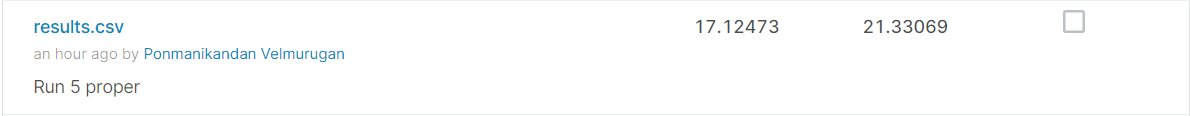

In [38]:
from IPython.display import Image
Image("Kaggle Score.png")